In [2]:
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# generate some data
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

In [4]:
X

array([[-0.6531912 , -0.81238767,  1.19535267, ...,  1.60033929,
         0.77295496, -0.29007468],
       [ 0.6776613 ,  1.05645354, -1.00719561, ...,  0.55370642,
         0.72971507,  0.68225029],
       [ 0.7245679 ,  0.87722803, -1.09393816, ...,  1.27031736,
         0.99399274,  0.27905571],
       ...,
       [-1.30993779, -1.601322  , -0.72688671, ..., -0.91066085,
        -0.98393053, -0.5319741 ],
       [ 1.2252827 ,  1.56968318,  1.20373667, ..., -0.69189211,
         0.17473731,  0.62583397],
       [ 1.10139394,  0.83424315, -0.5840946 , ..., -0.9221052 ,
         0.69061415, -0.46683995]])

In [5]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [7]:
# standard scale for any model that uses gradient descent
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# Topology
* an input layer
* one hidden layer
* relu activation function for all hidden layers
* sigmoid activation function for output layer to return a value between 0 and 1

In [17]:
model = Sequential()
model.add(Dense(32, # let's choose 32 neurons in the first layer
                input_shape=(20,), # 20 features
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 0s 37us/sample - loss: 0.7373 - accuracy: 0.5021 - val_loss: 0.7052 - val_accuracy: 0.5288
Epoch 2/10
7500/7500 [==============================] - 0s 6us/sample - loss: 0.6714 - accuracy: 0.5809 - val_loss: 0.6480 - val_accuracy: 0.6172
Epoch 3/10
7500/7500 [==============================] - 0s 6us/sample - loss: 0.6186 - accuracy: 0.6745 - val_loss: 0.5998 - val_accuracy: 0.7040
Epoch 4/10
7500/7500 [==============================] - 0s 5us/sample - loss: 0.5741 - accuracy: 0.7476 - val_loss: 0.5581 - val_accuracy: 0.7704
Epoch 5/10
7500/7500 [==============================] - 0s 5us/sample - loss: 0.5351 - accuracy: 0.7949 - val_loss: 0.5208 - val_accuracy: 0.8176
Epoch 6/10
7500/7500 [==============================] - 0s 5us/sample - loss: 0.5001 - accuracy: 0.8300 - val_loss: 0.4871 - val_accuracy: 0.8424
Epoch 7/10
7500/7500 [==============================] - 0s 6us/sample - los

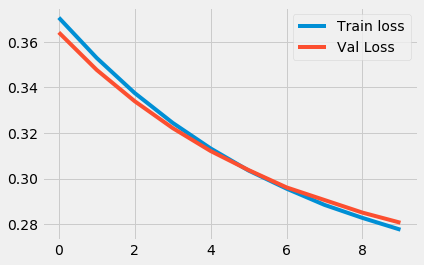

In [18]:
# visualization
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512, verbose=0)

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

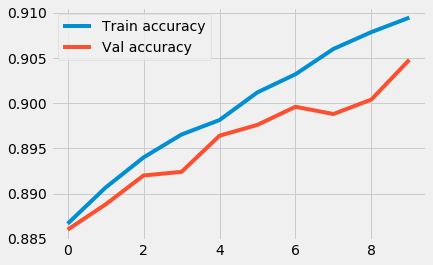

In [19]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();